In [7]:
# Standard libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
import nltk
import spacy
import string
import re

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Download necessary resources
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

# Load spaCy's small English model
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Install required packages (run this cell first!)
!pip install spacy scikit-learn nltk pandas matplotlib seaborn wordcloud plotly
!python -m spacy download en_core_web_sm

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

print("✅ All packages installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ All packages installed successfully!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Step 1: Install Kaggle API
!pip install kaggle

# Step 2: Upload your kaggle.json file
from google.colab import files
print("Please upload your kaggle.json file:")
uploaded = files.upload()

# Step 3: Set up API credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("✅ Kaggle API setup complete!")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle (2).json
✅ Kaggle API setup complete!


In [11]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/learn-ai-bbc.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [13]:
train_df = pd.read_csv("/tmp/BBC News Train.csv")
test_df = pd.read_csv("/tmp/BBC News Test.csv")
sample_df = pd.read_csv("/tmp/BBC News Sample Solution.csv")


In [14]:
train_df.head()
train_df.info()
train_df['Category'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


,count
Category,
sport,346
business,336
politics,274
entertainment,273
tech,261


In [15]:
df = train_df.copy()


In [16]:
# Set up dataframe
df = train_df.copy()  # Use training data as primary dataset

# 1. Examine your dataset
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
display(df.head())  # Better formatting in Colab

# 2. Identify text and category columns
text_column = 'Text'
category_column = 'Category'

# 3. Check for missing values
print("\nMissing values:")
print(df[[text_column, category_column]].isnull().sum())

# 4. Drop rows with missing values
df_clean = df.dropna(subset=[text_column, category_column])

# 5. Category distribution
print("\nCategory distribution:")
print(df_clean[category_column].value_counts())

# 6. Sampling if too large (not needed for BBC dataset)
df_final = df_clean.copy()

# 7. Rename columns for consistency
df_final = df_final.rename(columns={
    text_column: 'content',
    category_column: 'category'
})

# 8. Save cleaned dataset
df_final.to_csv('newsbot_dataset_prepared.csv', index=False)
print("\n✅ Dataset prepared and saved as 'newsbot_dataset_prepared.csv'")

# 9. Preview final dataset
print("\nPrepared Dataset Info:")
print(f"Shape: {df_final.shape}")
print(f"Columns: {df_final.columns.tolist()}")
display(df_final.head())


Dataset Info:
Shape: (1490, 3)
Columns: ['ArticleId', 'Text', 'Category']

First few rows:


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business



Missing values:
Text        0
Category    0
dtype: int64

Category distribution:
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

✅ Dataset prepared and saved as 'newsbot_dataset_prepared.csv'

Prepared Dataset Info:
Shape: (1490, 3)
Columns: ['ArticleId', 'content', 'category']


,ArticleId,content,category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy

# Download the punkt tokenizer data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Load spaCy model and NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Tokenize using spaCy
    doc = nlp(text)
    tokens = [token.text for token in doc]

    # 4. Remove stopwords and short tokens
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # 5. Lemmatize
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Reconstruct cleaned text
    cleaned_text = " ".join(lemmatized)
    return cleaned_text

In [25]:
df_final = df_final[df_final['content'].notnull()]
df_final['content'] = df_final['content'].astype(str)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df_sample = df_final.sample(n=100, random_state=42)
df_sample['clean_content'] = df_sample['content'].apply(preprocess_text)
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary components
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    try:
        # Make sure it's a string
        text = str(text).lower()

        # Remove punctuation/numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords and lemmatize
        cleaned_tokens = [
            lemmatizer.lemmatize(word)
            for word in tokens
            if word not in stop_words and len(word) > 2
        ]

        return " ".join(cleaned_tokens)
    except Exception as e:
        print(f"Error processing text: {e}")
        return ""


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy

# Load spaCy model and NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")


def preprocess_text(text):
    try:
        # Make sure it's a string
        text = str(text).lower()

        # Remove punctuation/numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenize using spaCy
        doc = nlp(text)
        tokens = [token.text for token in doc]

        # Remove stopwords and short tokens
        tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

        # Lemmatize
        lemmatized = [lemmatizer.lemmatize(word) for word in tokens]

        # Reconstruct cleaned text
        cleaned_text = " ".join(lemmatized)

        if not cleaned_text:
            print(f"Warning: Cleaned text is empty for input: {text[:50]}...") # Print first 50 chars of original text

        return cleaned_text
    except Exception as e:
        print(f"Error processing text: {e} for input: {text[:50]}...") # Print first 50 chars of original text
        return ""


df_final = df_final[df_final['content'].notnull()]
df_final['content'] = df_final['content'].astype(str)
df_final['clean_content'] = df_final['content'].apply(preprocess_text)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [30]:
tfidf = TfidfVectorizer(
    max_df=0.95,      # ignore terms in >95% of docs
    min_df=2,         # ignore rare terms
    max_features=1000,  # limit number of features
    ngram_range=(1, 2), # unigrams and bigrams
    stop_words='english'
)

X_tfidf = tfidf.fit_transform(df_final['clean_content'])  # sparse matrix


/tmp/ipython-input-31-4097489545.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_tfidf.values, y=mean_tfidf.index, palette='viridis')


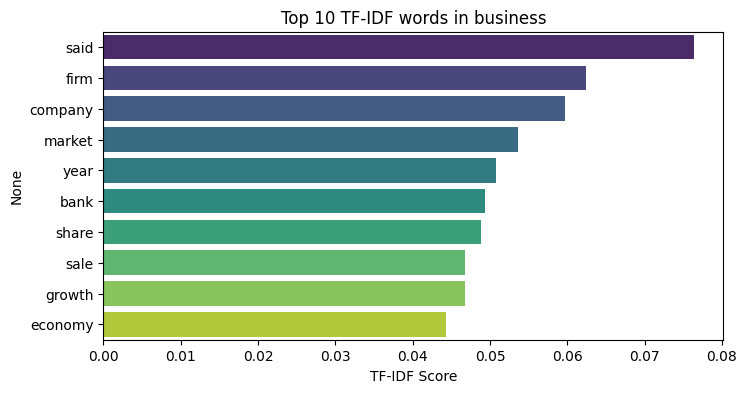

/tmp/ipython-input-31-4097489545.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_tfidf.values, y=mean_tfidf.index, palette='viridis')


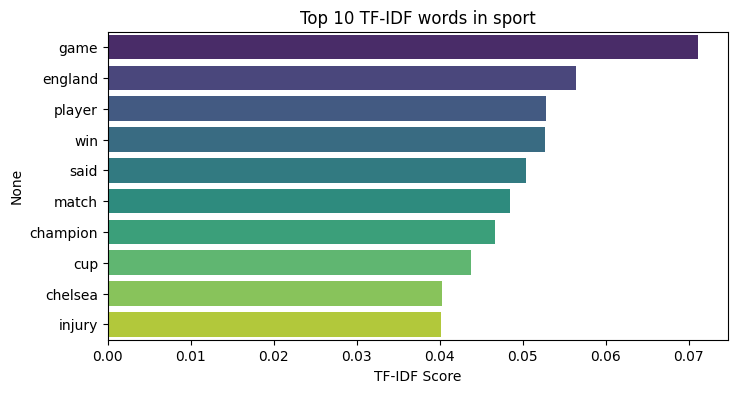

/tmp/ipython-input-31-4097489545.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_tfidf.values, y=mean_tfidf.index, palette='viridis')


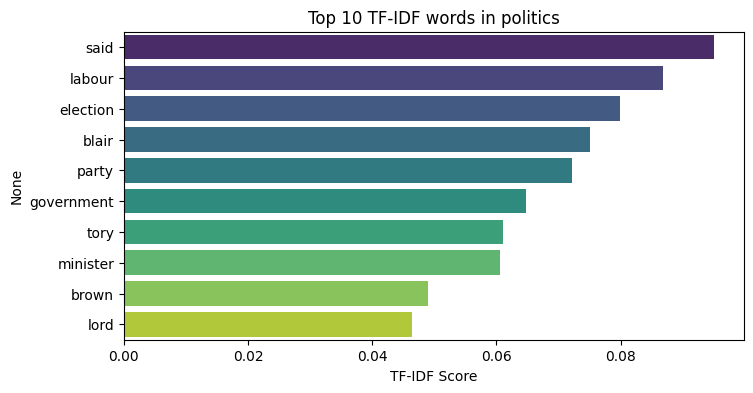

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert tf-idf matrix to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df['category'] = df_final['category'].values

# Function to plot top TF-IDF words for each category
def plot_top_words(category, n=10):
    subset = tfidf_df[df_final['category'] == category].drop(columns='category')
    mean_tfidf = subset.mean().sort_values(ascending=False)[:n]

    plt.figure(figsize=(8, 4))
    sns.barplot(x=mean_tfidf.values, y=mean_tfidf.index, palette='viridis')
    plt.title(f"Top {n} TF-IDF words in {category}")
    plt.xlabel("TF-IDF Score")
    plt.show()

# Example: Plot for 3 categories
plot_top_words('business')
plot_top_words('sport')
plot_top_words('politics')


In [33]:
tech_df = df_final[df_final['category'] == 'tech']
tech_vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
tech_X = tech_vectorizer.fit_transform(tech_df['clean_content'])

pd.DataFrame({
    'word': tech_vectorizer.get_feature_names_out(),
    'tfidf': tech_X.mean(axis=0).A1
}).sort_values('tfidf', ascending=False)


,word,tfidf
11,said,0.265275
9,people,0.173456
3,game,0.138439
12,service,0.130685
13,software,0.126890
14,technology,0.125624
17,user,0.121074
19,year,0.117717
8,new,0.114741
0,computer,0.108465


Converted cleaned text into numerical features (TF-IDF)

Visualized top TF-IDF words per news category

Gained insight into language patterns and focus of each category

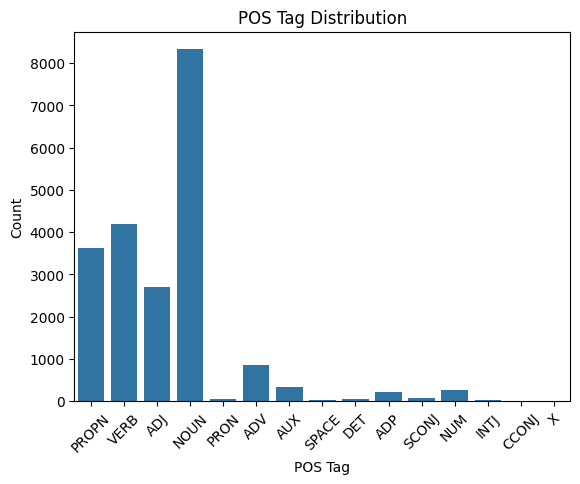

In [35]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

# Extract POS tags from the first 100 articles to save time
df_sample_pos = df_final.sample(n=100, random_state=42)
df_sample_pos['pos_tags'] = df_sample_pos['clean_content'].apply(lambda x: [token.pos_ for token in nlp(x)])

# Flatten list and count POS
all_tags = [tag for sublist in df_sample_pos['pos_tags'] for tag in sublist]
tag_counts = Counter(all_tags)

# Visualize POS distribution
sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()))
plt.title("POS Tag Distribution")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [36]:
# Use spaCy to extract syntactic dependencies and noun chunks
def extract_dependencies(text):
    doc = nlp(text)
    return [(token.text, token.dep_, token.head.text) for token in doc]

df_final['syntax_relations'] = df_final['clean_content'].apply(lambda x: extract_dependencies(x[:500]))  # Shorten for performance

# Show example
df_final[['clean_content', 'syntax_relations']].head()


,clean_content,syntax_relations
0,worldcom exboss launch defence lawyer defendin...,"[(worldcom, compound, lawyer), (exboss, compou..."
1,german business confidence slide german busine...,"[(german, amod, confidence), (business, compou..."
2,bbc poll indicates economic gloom citizen majo...,"[(bbc, compound, poll), (poll, nsubj, indicate..."
3,lifestyle governs mobile choice faster better ...,"[(lifestyle, compound, governs), (governs, nsu..."
4,enron boss payout eighteen former enron direct...,"[(enron, compound, boss), (boss, compound, pay..."


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


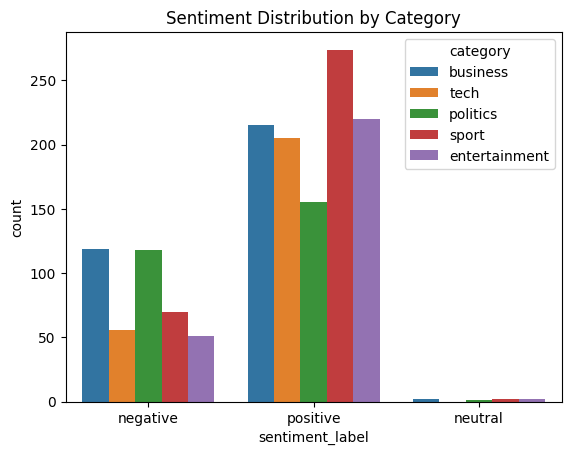

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df_final['sentiment'] = df_final['clean_content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify as positive, neutral, negative
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_final['sentiment_label'] = df_final['sentiment'].apply(classify_sentiment)

# Visualize sentiment distribution
sns.countplot(data=df_final, x='sentiment_label', hue='category')
plt.title("Sentiment Distribution by Category")
plt.show()


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_final['clean_content'], df_final['category'], test_size=0.2, random_state=42)

# Try two classifiers
pipelines = {
    'Naive Bayes': Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())]),
    'SVM': Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])
}

# Train and evaluate
for name, pipe in pipelines.items():
    print(f"\n{name} Results:")
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))



Naive Bayes Results:
               precision    recall  f1-score   support

     business       0.95      0.99      0.97        75
entertainment       1.00      0.98      0.99        46
     politics       0.93      0.95      0.94        56
        sport       0.97      1.00      0.98        63
         tech       1.00      0.91      0.95        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298

[[74  0  1  0  0]
 [ 1 45  0  0  0]
 [ 2  0 53  1  0]
 [ 0  0  0 63  0]
 [ 1  0  3  1 53]]

SVM Results:
               precision    recall  f1-score   support

     business       0.95      0.99      0.97        75
entertainment       0.98      1.00      0.99        46
     politics       0.96      0.95      0.95        56
        sport       0.98      1.00      0.99        63
         tech       1.00      0.93      0.96        58

     accuracy                           0.9

In [39]:
# Extract named entities using spaCy
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df_final['entities'] = df_final['content'].apply(lambda x: extract_entities(x))

# Count most common entities
from collections import defaultdict

entity_counts = defaultdict(Counter)
for ents in df_final['entities']:
    for ent, label in ents:
        entity_counts[label][ent] += 1

# Display top 5 for each entity type
for label, counter in entity_counts.items():
    print(f"\nTop entities for {label}:")
    for ent, count in counter.most_common(5):
        print(f"{ent}: {count}")



Top entities for ORDINAL:
first: 767
second: 325
third: 217
fourth: 79
fifth: 39

Top entities for PERSON:
blair: 172
eu: 124
tony blair: 103
don: 77
michael howard: 74

Top entities for GPE:
us: 565
uk: 546
britain: 285
london: 276
france: 240

Top entities for DATE:
2004: 265
2005: 239
last year: 217
this year: 189
2003: 175

Top entities for MONEY:
million dollar: 22
50 cent: 17
500: 16
1bn: 14
1: 12

Top entities for ORG:
bbc: 232
microsoft: 130
sony: 102
the bbc news: 57
bbc news: 57

Top entities for NORP:
british: 330
european: 217
tory: 132
french: 123
american: 115

Top entities for LOC:
europe: 235
africa: 52
asia: 38
north america: 18
the middle east: 12

Top entities for CARDINAL:
one: 666
two: 600
three: 320
six: 207
four: 206

Top entities for PERCENT:
20%: 30
100%: 25
40%: 25
10%: 24
15%: 21

Top entities for TIME:
evening: 33
morning: 19
night: 19
noon: 10
the night: 10

Top entities for EVENT:
the iraq war: 28
world war ii: 5
the world championships: 2
hugo: 2
world c